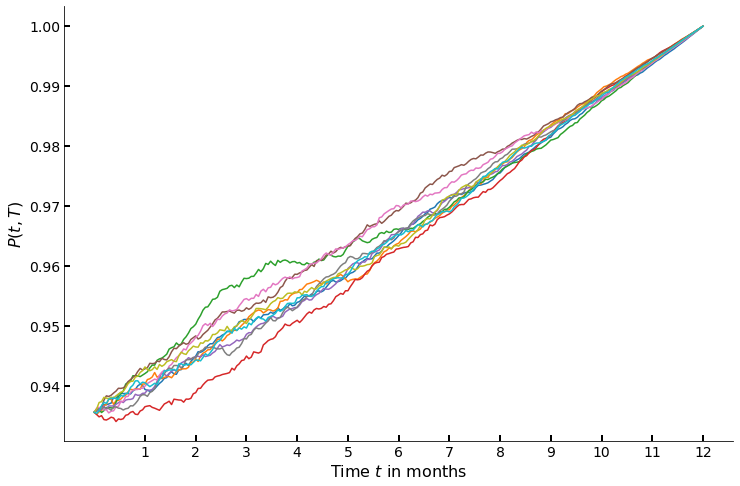

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# encoded vasicek in bond formula
def Bond(r0 = 0.06, kappa = 0.86, theta = 0.08, Volatility = 0.01, Time = 1,
         Steps = 252, Paths = 10, n_plots = 10):

    sigma = Volatility
    Np = Paths # number of paths
    Nt = Steps+1 # number of samples
    dt = Time/Steps
    z = np.random.normal(loc=0, scale=1, size = (Nt, Np)) # Continous standardized RV z = [0,1]
    
    r = np.zeros(shape = (Nt, Np))
    r[0] = r0
    
    for i in range(1, Nt):
        r[i] = r[i-1] + kappa*(theta-r[i-1])*dt + sigma*z[i]*np.sqrt(dt)
    
    def A(t = 0, T = Time):
        return (T - t)*(2*kappa**2*theta - sigma**2)/(2*kappa**2) + sigma**2*np.exp(-2*kappa*(T - t))/(4*kappa**3) + (kappa**2*theta - sigma**2)*np.exp(-kappa*(T - t))/kappa**3 - (4*kappa**2*theta - 3*sigma**2)/(4*kappa**3)
    def B(t = 0, T = Time):
        return 1/kappa - np.exp(-kappa*(T - t))/kappa
    def P(t = 0, T = Time):
        return np.exp(-A(t, T)[:, None] - B(t, T)[:, None]*r)

    discount = P(np.arange(0, Time+0.001, Time/Steps), Time)
    
    fig, ax = plt.subplots(figsize = [12, 8]);
    plt.plot(discount[:,:n_plots])
    plt.ylabel('$P(t,T)$', fontsize = 16)
    plt.xlabel('Time $t$ in months', fontsize = 16)
    ax.spines[["right", "top"]].set_visible(False)
    times = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])/12
    x = (Steps*times/Time).astype(int)
    plt.xticks(x, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], size = 14)
    plt.yticks(size = 14)
    ax.tick_params(direction = 'in', length=6, width=2, colors='k',
               grid_color='k', grid_alpha=.1);
Bond(r0 = 0.06, kappa = 0.86, theta = 0.08, Volatility = 0.01, Time = 1,
         Steps = 252, Paths = 10, n_plots = 10);